## STAT301 2024W2 Group 26 Project 
## Student Number: 23540214
### Loading of Libraries & Dataset

In [1]:
Sys.setLanguage("en")
suppressPackageStartupMessages({
library(haven)    # Loading of .dta, .csv etc. datasets
library(tidyverse)
library(dplyr)
library(datasets)
library(car)
install.packages("vtable")    # maybe needed if not installed
# install.packages("corrplot")  # maybe needed if not installed
# install.packages("sandwich")  # maybe needed if not installed
# install.packages("lmtest")    # maybe needed if not installed
library(vtable)
library(corrplot)
library(sandwich)
library(lmtest)
library(repr)
library(tidymodels)
install.packages("stargazer")      # maybe needed if not installed
library(stargazer)
library(modelr)
library(broom)
library(infer)
library(GGally)
library(leaps)
install.packages("poissonreg")
library(poissonreg)
library(glmnet)
install.packages("coefplot")      # maybe needed if not installed
library(coefplot)
})

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Read the CSV file with specified column types 
market_data <- as_factor(read_delim("https://raw.githubusercontent.com/DrakenRaptor/STAT301_ProjectGrp26/refs/heads/main/marketing_campaign.csv", delim = "\t"))

# Check the structure of data types 
str(market_data)

head(market_data)
str(market_data$Dt_Customer)


Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [2,240 × 29] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID                 : num [1:2240] 5524 2174 4141 6182 5324 ...
 $ Year_Birth         : num [1:2240] 1957 1954 1965 1984 1981 ...
 $ Education          : chr [1:2240] "Graduation" "Graduation" "Graduation" "Graduation" ...
 $ Marital_Status     : chr [1:2240] "Single" "Single" "Together" "Together" ...
 $ Income             : num [1:2240] 58138 46344 71613 26646 58293 ...
 $ Kidhome            : num [1:2240] 0 1 0 1 1 0 0 1 1 1 ...
 $ Teenhome           : num [1:2240] 0 1 0 0 0 1 1 0 0 1 ...
 $ Dt_Customer        : chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...
 $ Recency            : num [1:2240] 58 38 26 26 94 16 34 32 19 68 ...
 $ MntWines           : num [1:2240] 635 11 426 11 173 520 235 76 14 28 ...
 $ MntFruits          : num [1:2240] 88 1 49 4 43 42 65 10 0 0 ...
 $ MntMeatProducts    : num [1:2240] 546 6 127 20 118 98 164 56 24 6 ...
 $ MntFishProducts    : num [1:2240] 172 2 111 10 46 0 50 3

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


 chr [1:2240] "04-09-2012" "08-03-2014" "21-08-2013" "10-02-2014" ...


## Introduction & Data Description

The assigned dataset for the project is the Customer Personality Analysis found on In this project, the code below show the descriptive summary of the dataset.

### Data Description

This dataset consists of marketing campaign data for a company, with 2,240 observations and 28 variables. The data captures various attributes about customers, including demographic information, purchase history, and responses to marketing campaigns and purchase history.

| **Variable Name**       | **Type**     | **Description**                                               |
|-------------------------|--------------|---------------------------------------------------------------|
| `ID`                    | Count Data   | Unique identifier for each customer                           |
| `Year_Birth`            | Count Data   | Year of birth of the customer                                 |
| `Education`             | Factor       | Education level of the customer                               |
| `Marital_Status`        | Factor       | Marital status of the customer                                |
| `Income`                | Numeric      | Annual income of the customer                                 |
| `Kidhome`               | Count Data   | Number of children in the customer's household                |
| `Teenhome`              | Count        | Number of teenagers in the customer's household               |
| `Dt_Customer`           | Date\*       | Date of enrollment with the company                           |
| `Recency`               | Count Data   | Days since the last purchase                                  |
| `MntWines`              | Numeric      | Amount spent on wine                                          |
| `MntFruits`             | Numeric      | Amount spent on fruits                                        |
| `MntMeatProducts`       | Numeric      | Amount spent on meat products                                 |
| `MntFishProducts`       | Numeric      | Amount spent on fish products                                 |
| `MntSweetProducts`      | Numeric      | Amount spent on sweet products                                |
| `MntGoldProds`          | Numeric      | Amount spent on gold products                                 |
| `NumDealsPurchases`     | Numeric      | Number of purchases made with a discount                      |
| `NumWebPurchases`       | Numeric      | Number of purchases made through the web                      |
| `NumCatalogPurchases`   | Numeric      | Number of purchases made using a catalog                      |
| `NumStorePurchases`     | Numeric      | Number of purchases made directly in stores                   |
| `NumWebVisitsMonth`     | Numeric      | Number of visits to the company's website in the last month   |
| `AcceptedCmp3`          | Binary       | 1 if the customer accepted the 3rd campaign, 0 otherwise      |
| `AcceptedCmp4`          | Binary       | 1 if the customer accepted the 4th campaign, 0 otherwise      |
| `AcceptedCmp5`          | Binary       | 1 if the customer accepted the 5th campaign, 0 otherwise      |
| `AcceptedCmp1`          | Binary       | 1 if the customer accepted the 1st campaign, 0 otherwise      |
| `AcceptedCmp2`          | Binary       | 1 if the customer accepted the last campaign, 0 otherwise     |
| `Complain`              | Binary       | 1 if the customer has complained in the last 2 years, 0 otherwise |
| `Country`               | Factor       | Country of the customer                                       |


*Given that Dt_Customer can be manipulated within the tidyverse library in*
```r 
library(lubridate)
```
*Hence, I have classified it as a `Date` type in the Data Type.*

**Data Source**: The dataset was collected as part of a marketing campaign analysis by Dr. Omar Romero-Hernandez. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data


## Research Question (Question of Interest)

Customer Personality Analysis is essential to help a firm to modify its product to meet the needs of customers from different segments. In this project, I wish to predict the number of purchases spent made on the web `NumWebPurchases` among customers against the different covariates or predictors such as customer's `Income`, level of education, `NumStorePurchases` , `NumCatalogPurchases`, `NumWebVisitsMonth`, `MntGoldProducts`.

<span style="color: magenta;"> The research question will primarily be focused on prediction. </span>

**<br> Legend:**
- `NumWebPurchases` is the response variable, representing the number of web purchases made through the company's website.
- `Income` is a covariate that indicates the annual earnings of the customer.
- `NumStorePurchases` is a covariate representing the number of purchases made in physical stores.
- `NumCatalogPurchases` is a covariate representing the number of purchases made using a catalog.
- `NumWebVisitsMonth` is a covariate representing the number of visits to the company's website in the last month.
- `MntGoldProds` is a covariate representing the amount spent on gold products.
- `Education` is a covariate that can be represented as a categorical variable.
- `Marital_Status` is a categorical variable that can be represented numerically.
- `NumStorePurchases` is one of the covariates or predictor which represents the number of purchases made in store.
- `Marital_Status` is a categorical variable which can be represented by numerical
- `Education` is one of the covariates which can be represented by a categorical variable.

The code belows shows the unique values present in the `Education` and `Marital_Status` column of the `market_data` data frame. 


In [3]:
unique(market_data$Education)  
unique(market_data$Marital_Status)     # Possible covariates to be used as factor variables for research model, to classify YOLO as single?
market_data_web <- market_data |>
    select(MntGoldProds)

head(market_data_web)
tail(market_data_web)


# Extract the unique values and their counts
education_counts <- table(market_data$Education) 
education_counts


# Extract Unique values of Marital Status
marital_counts <- table(market_data$Marital_Status)
marital_counts


[1] "Graduation" "PhD"        "Master"     "Basic"      "2n Cycle"

[1] "Single"   "Together" "Married"  "Divorced" "Widow"    "Alone"    "Absurd"  
[8] "YOLO"

MntGoldProds
<dbl>
88
6
42
5
15
14


MntGoldProds
<dbl>
9
247
8
24
61
21



  2n Cycle      Basic Graduation     Master        PhD 
       203         54       1127        370        486 


  Absurd    Alone Divorced  Married   Single Together    Widow     YOLO 
       2        3      232      864      480      580       77        2 

### EDA and Visualisation

From the code above, there's seem to be the a huge amount of respondents who possess `2n Cycle` education level. This means that there's a need to include this in the analysis. Since `2n Cycle` is the same as Master's Degree as found in https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/discussion/466400. The code below shows the wrangling tp include them as `Master`. 
A correlation plot maybe suitable to check for the relationship between the continuous random variable such as `Income`, `NumCatalogPurchases`, `NumWebVisitsMonth`, `NumStorePurchases`, `NumWebPurchases`.

A correlation plot maybe suitable to check for the relationship between the continuous random variable such as `Income`, `NumCatalogPurchases`, `NumWebVisitsMonth`, `NumStorePurchases`, `NumWebPurchases`. The correlation plot provides a visual summary of the linear relationship betweem the selected variables. This can help me to see which variables I can include in the regression model for analysation which will be done at a later stage. Additionally, the correlation plot serves as an indicator to check if there's perfect multicolinearity between different variables where an extreme high correlation coefficients (close to -1 or +1) may indicate that.

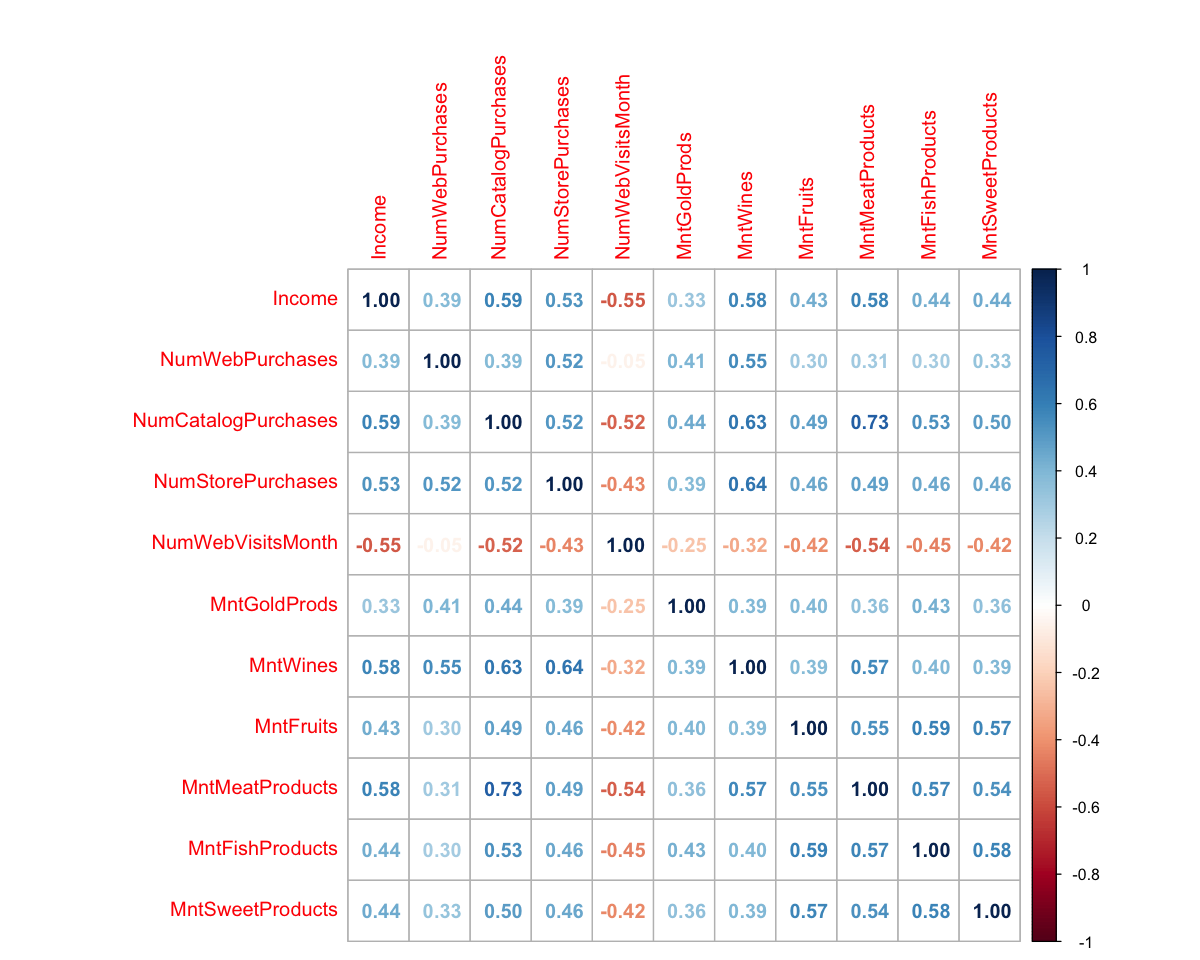

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8)
# Using correlation plot to check the relationship between the variables
corr_plt_dat <- market_data[, c("Income", "NumWebPurchases", "NumCatalogPurchases",
 "NumStorePurchases", "NumWebVisitsMonth", "MntGoldProds", "MntWines", "MntFruits", 
 "MntMeatProducts", "MntFishProducts", "MntSweetProducts")] |>
as.data.frame() 
# Ensure there are no missing values
corr_plt_dat <- na.omit(corr_plt_dat)

cor_matrix <- cor(corr_plt_dat)

# corrplot(cor_matrix, order = "hclust", addrect = 2)
corrplot(cor_matrix, method = "number", addrect = 2)  # To display the correlation values

From the correlation plot, there seems to be a strong positve relationship between `NumCatalogPurchases` and `MntMeatProducts`. This suggests that individuals with higher income tend to make purchases through the Catalogue. Additionally, there's seems to be a weaker (moderate) relationship between `Income` and `NumWebVisitsMonth` which suggests there may be other confounding variables that may influence the number of web purchases and `Income`. Conversely, there's seem to be a moderate-strong negative relationship between `MntMeatProducts` and `NumWebVisitsMonth`.

### Data Wrangling

The code below shows the wrangling of the dataset for the different education level and marital status which will be useful for future analysis for the project.

In [5]:
# Recode '2n Cycle' to 'Master' in the Education column using case_when
market_data <- market_data %>%
    mutate(Education = case_when(
        Education == "2n Cycle" ~ "Master",
        TRUE ~ Education
    ))

# Verify the changes
unique(market_data$Education)

# Recode specific values to 'Single' in the Marital_Status column using case_when
market_data <- market_data %>%
    mutate(Marital_Status = case_when(
        Marital_Status %in% c("Absurd", "Alone", "YOLO", "Together") ~ "Single",
        TRUE ~ Marital_Status
    ))

# Verify the changes
unique(market_data$Marital_Status)

# Convert and Parse Dt_Customer to Date format
market_data$Dt_Customer <- dmy(market_data$Dt_Customer) 
market_data$Dt_Customer

[1] "Graduation" "PhD"        "Master"     "Basic"

[1] "Single"   "Married"  "Divorced" "Widow"

[1] "2012-09-04" "2014-03-08" "2013-08-21" "2014-02-10" "2014-01-19"
   [6] "2013-09-09" "2012-11-13" "2013-05-08" "2013-06-06" "2014-03-13"
  [11] "2013-11-15" "2012-11-13" "2013-11-15" "2013-11-15" "2012-10-10"
  [16] "2012-11-24" "2012-12-24" "2012-08-31" "2013-03-28" "2012-11-03"
  [21] "2012-08-08" "2013-01-06" "2012-12-23" "2014-01-11" "2013-03-18"
  [26] "2013-01-02" "2013-05-27" "2013-02-20" "2013-05-31" "2013-11-22"
  [31] "2014-05-22" "2013-05-11" "2012-10-10" "2012-10-29" "2013-02-20"
  [36] "2013-08-29" "2013-12-31" "2013-09-02" "2014-02-11" "2013-02-01"
  [41] "2013-04-29" "2013-03-12" "2012-12-24" "2013-11-05" "2013-10-02"
  [46] "2014-06-28" "2012-11-09" "2013-05-24" "2014-01-01" "2012-11-08"
  [51] "2014-05-12" "2012-08-11" "2013-01-02" "2014-06-07" "2013-06-12"
  [56] "2012-11-19" "2013-04-02" "2014-04-28" "2013-06-17" "2014-03-03"
  [61] "2013-07-04" "2012-09-07" "2013-02-18" "2013-06-11" "2013-12-06"
  [66] "2013-05-21" "2014-05-11" "2014-03-19" "2013-09-27" "2013-04-08"
  [71] "2012-09-11" "2012-09-14" "2013-03-17" "2013-04-05" "2014-04-30"
  [76] "2012-12-19" "2012-08-27" "2012-10-12" "2013-09-04" "2013-01-02"
  [81] "2012-08-29" "2013-06-23" "2013-07-03" "2013-05-11" "2014-02-25"
  [86] "2013-08-11" "2013-07-16" "2014-05-28" "2014-05-12" "2014-01-21"
  [91] "2012-11-19" "2014-05-27" "2013-11-23" "2014-03-23" "2014-05-24"
  [96] "2014-05-22" "2012-11-22" "2013-04-11" "2013-12-01" "2013-06-20"
 [101] "2013-07-23" "2014-03-30" "2013-04-20" "2013-05-17" "2014-05-08"
 [106] "2013-12-10" "2013-09-24" "2013-02-02" "2012-12-19" "2012-12-07"
 [111] "2013-11-02" "2012-11-10" "2014-06-25" "2013-01-02" "2012-12-12"
 [116] "2013-09-10" "2014-01-24" "2013-02-19" "2013-07-11" "2013-11-14"
 [121] "2013-06-20" "2014-02-24" "2013-09-04" "2013-04-22" "2013-03-12"
 [126] "2013-02-18" "2013-04-21" "2014-06-08" "2013-07-11" "2014-05-10"
 [131] "2013-09-30" "2013-03-10" "2014-02-10" "2013-08-11" "2013-08-14"
 [136] "2013-03-17" "2012-08-08" "2013-07-07" "2014-05-19" "2013-07-28"
 [141] "2012-10-19" "2013-11-14" "2013-04-19" "2013-08-28" "2013-03-19"
 [146] "2012-10-18" "2012-10-28" "2013-08-28" "2012-08-22" "2014-06-21"
 [151] "2014-04-24" "2014-03-07" "2012-12-14" "2014-05-12" "2012-10-09"
 [156] "2013-02-19" "2013-07-08" "2013-09-12" "2013-10-17" "2013-08-20"
 [161] "2013-07-01" "2012-11-05" "2014-01-05" "2013-05-01" "2014-03-01"
 [166] "2013-11-13" "2013-11-18" "2013-08-28" "2013-11-02" "2014-02-25"
 [171] "2014-04-21" "2013-07-13" "2014-04-21" "2014-01-30" "2014-04-04"
 [176] "2012-09-12" "2012-12-16" "2014-05-23" "2014-06-24" "2013-12-01"
 [181] "2014-05-11" "2014-05-10" "2013-09-28" "2014-01-22" "2014-06-15"
 [186] "2012-12-05" "2014-03-08" "2013-08-02" "2013-03-19" "2013-02-23"
 [191] "2012-09-09" "2013-05-17" "2013-09-26" "2013-05-30" "2013-02-18"
 [196] "2013-12-29" "2014-05-13" "2013-09-19" "2013-01-17" "2014-03-31"
 [201] "2014-06-29" "2013-12-09" "2013-10-14" "2012-11-02" "2013-07-17"
 [206] "2012-11-10" "2013-12-08" "2013-05-13" "2014-06-08" "2012-09-10"
 [211] "2013-03-31" "2014-03-18" "2012-10-05" "2013-01-21" "2013-05-04"
 [216] "2014-04-01" "2014-05-12" "2013-11-15" "2013-08-31" "2012-11-14"
 [221] "2014-04-11" "2013-11-14" "2014-04-14" "2013-01-05" "2012-09-08"
 [226] "2013-03-26" "2012-10-25" "2012-12-09" "2012-08-08" "2014-02-16"
 [231] "2013-03-20" "2013-01-05" "2013-05-15" "2014-04-16" "2013-03-23"
 [236] "2013-12-09" "2013-12-04" "2013-10-04" "2013-12-26" "2014-05-17"
 [241] "2013-10-28" "2012-12-23" "2013-07-31" "2013-11-28" "2012-08-17"
 [246] "2014-06-05" "2013-05-20" "2013-01-09" "2012-08-31" "2012-10-29"
 [251] "2013-09-16" "2013-10-27" "2013-04-05" "2012-09-22" "2012-08-29"
 [256] "2012-10-13" "2012-10-16" "2012-10-22" "2013-06-04" "2013-12-08"
 [261] "2012-10-10" "2013-05-22" "2014-06-17" "2012-11-23" "2013-02-03"
 [266] "2013-03-14" "2014-06-26" "2012-10-15" "2013-06-19" "2013-10-04"
 [271] "2012-09-22" "2014-03-20" "2014-02-04" "2014-04-06" "2013-02-06"
 [276] "2013-09-16" "2013-01-17" "2014-04-3

In [6]:
# Cleaned Data
head(market_data)


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Single,71613,0,0,2013-08-21,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Single,26646,1,0,2014-02-10,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Single,62513,0,1,2013-09-09,16,520,⋯,6,0,0,0,0,0,0,3,11,0


### Methods and Plan

Given that the requirement of the project is to use Poisson Regression, variable selection will be done in the final project. Forward and Backward Selection is used to 

Since the research question is focused on prediction, there's a need to split the dataset between the testing and training datasets using the `tidymodels` package. The code below shows the splitting of the dataset. 

In [7]:
# Remove rows with missing values
market_data <- na.omit(market_data)
set.seed(5638)

market_data_split <- initial_split(market_data, prop = 0.75, strata = Income)
market_data_train <- training(market_data_split)

market_data_test <- testing(market_data_split)

head(market_data_train)
cat('\nMarket Training Data has', nrow(market_data_train), 'rows.\n')

ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6177,1985,PhD,Married,33454,1,0,2013-05-08,32,76,⋯,8,0,0,0,0,0,0,3,11,0
2569,1987,Graduation,Married,17323,0,0,2012-10-10,38,3,⋯,8,0,0,0,0,0,0,3,11,0
2278,1985,Master,Single,33812,1,0,2012-11-03,86,4,⋯,6,0,0,0,0,0,0,3,11,0
5376,1979,Graduation,Married,2447,1,0,2013-01-06,42,1,⋯,1,0,0,0,0,0,0,3,11,0
10755,1976,Master,Married,23718,1,0,2013-09-02,76,6,⋯,7,0,0,0,0,0,0,3,11,0
2139,1975,Master,Married,7500,1,0,2013-10-02,19,3,⋯,5,0,0,0,0,0,0,3,11,0



Market Training Data has 1660 rows.


In [8]:
cat('\nMarket Testing data has', nrow(market_data_test), 'rows.')


Market Testing data has 556 rows.

In [9]:
market_foward_sel1 <- regsubsets(NumWebPurchases ~ ., nvmax = 29,
        data = market_data_train, method = "forward")
        
summary(market_foward_sel1)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(NumWebPurchases ~ ., nvmax = 29, data = market_data_train, 
    method = "forward")
32 Variables  (and intercept)
                      Forced in Forced out
ID                        FALSE      FALSE
Year_Birth                FALSE      FALSE
EducationGraduation       FALSE      FALSE
EducationMaster           FALSE      FALSE
EducationPhD              FALSE      FALSE
Marital_StatusMarried     FALSE      FALSE
Marital_StatusSingle      FALSE      FALSE
Marital_StatusWidow       FALSE      FALSE
Income                    FALSE      FALSE
Kidhome                   FALSE      FALSE
Teenhome                  FALSE      FALSE
Dt_Customer               FALSE      FALSE
Recency                   FALSE      FALSE
MntWines                  FALSE      FALSE
MntFruits                 FALSE      FALSE
MntMeatProducts           FALSE      FALSE
MntFishProducts           FALSE      FALSE
MntSweetProducts          FALSE      FALSE
MntGoldProds        

In [10]:
market_forward_sel <- regsubsets(NumWebPurchases ~ Income + NumWebVisitsMonth + MntGoldProds + MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts, data = market_data_train, nvmax = 8, method = "forward")

market_forward_sel_summary <- summary(market_forward_sel)
market_forward_sel_summary

Subset selection object
Call: regsubsets.formula(NumWebPurchases ~ Income + NumWebVisitsMonth + 
    MntGoldProds + MntWines + MntFruits + MntMeatProducts + MntFishProducts + 
    MntSweetProducts, data = market_data_train, nvmax = 8, method = "forward")
8 Variables  (and intercept)
                  Forced in Forced out
Income                FALSE      FALSE
NumWebVisitsMonth     FALSE      FALSE
MntGoldProds          FALSE      FALSE
MntWines              FALSE      FALSE
MntFruits             FALSE      FALSE
MntMeatProducts       FALSE      FALSE
MntFishProducts       FALSE      FALSE
MntSweetProducts      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         Income NumWebVisitsMonth MntGoldProds MntWines MntFruits
1  ( 1 ) " "    " "               " "          "*"      " "      
2  ( 1 ) " "    " "               "*"          "*"      " "      
3  ( 1 ) " "    "*"               "*"          "*"      " "      
4  ( 1 ) "*"    "*"               "*"    

In [11]:
# Define the response variable and predictors
response <- "NumWebPurchases" 
predictors <- setdiff(names(market_data), response)  # All other variables as predictors

In [12]:
# Perform forward selection using regsubsets
forward_selection <- regsubsets(
  as.formula(paste(response, "~", paste(predictors, collapse = " + "))),
  data = market_data,
  nvmax = length(predictors),  # Maximum number of predictors to consider
  method = "forward"
)

# Summary of forward selection
summary_forward <- summary(forward_selection)
print(summary_forward)

# Display the best model for each number of predictors
summary_forward$which

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:
Subset selection object
Call: regsubsets.formula(as.formula(paste(response, "~", paste(predictors, 
    collapse = " + "))), data = market_data, nvmax = length(predictors), 
    method = "forward")
32 Variables  (and intercept)
                      Forced in Forced out
ID                        FALSE      FALSE
Year_Birth                FALSE      FALSE
EducationGraduation       FALSE      FALSE
EducationMaster           FALSE      FALSE
EducationPhD              FALSE      FALSE
Marital_StatusMarried     FALSE      FALSE
Marital_StatusSingle      FALSE      FALSE
Marital_StatusWidow       FALSE      FALSE
Income                    FALSE      FALSE
Kidhome                   FALSE      FALSE
Teenhome                  FALSE      FALSE
Dt_Customer               FALSE      FALSE
Recency                   FALSE      FALSE
MntWines                  FALSE      FALSE
MntFruits                 FALSE      FALSE
MntMeatProducts           FALSE      FALSE
Mn

,(Intercept),ID,Year_Birth,EducationGraduation,EducationMaster,EducationPhD,Marital_StatusMarried,Marital_StatusSingle,Marital_StatusWidow,Income,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
9,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
10,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [13]:
# Define the Poisson regression specification
poisson_spec <-
    poisson_reg() %>%
    set_engine("glm") %>%
    set_mode("regression")

# Define the recipe
poisson_recipe <- recipe(NumWebPurchases ~ Income + MntGoldProds + NumCatalogPurchases 
    + NumStorePurchases + NumWebVisitsMonth + MntWines + MntFruits + MntMeatProducts 
    + MntFishProducts + MntSweetProducts, data = market_data_train)

# Create and fit the workflow
poisson_model <-
    workflow() %>%
    add_recipe(poisson_recipe) %>%
    add_model(poisson_spec) %>%
    fit(data = market_data_train)

poisson_coeffs <- poisson_model |>
    extract_fit_parsnip() |>
    tidy()

poisson_coeffs

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.665227e-03,5.840664e-02,-0.1312390,8.955863e-01
Income,2.764031e-06,4.050723e-07,6.8235510,8.881718e-12
MntGoldProds,1.766394e-03,2.325296e-04,7.5964275,3.044177e-14
NumCatalogPurchases,2.120930e-02,6.481588e-03,3.2722376,1.066998e-03
NumStorePurchases,6.066694e-02,4.763091e-03,12.7368853,3.688279e-37
NumWebVisitsMonth,9.361102e-02,6.343437e-03,14.7571461,2.767460e-49
MntWines,4.472604e-04,4.813298e-05,9.2921820,1.511572e-20
MntFruits,1.622307e-04,3.555620e-04,0.4562655,6.481991e-01
MntMeatProducts,-2.304876e-05,7.996956e-05,-0.2882192,7.731790e-01


In [14]:
reg1 <- glm(NumWebPurchases ~ Income + MntGoldProds + NumCatalogPurchases + NumStorePurchases + NumWebVisitsMonth + MntWines + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts, data = market_data, family = poisson)
summary(reg1)


Call:
glm(formula = NumWebPurchases ~ Income + MntGoldProds + NumCatalogPurchases + 
    NumStorePurchases + NumWebVisitsMonth + MntWines + MntFruits + 
    MntMeatProducts + MntFishProducts + MntSweetProducts, family = poisson, 
    data = market_data)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          7.049e-02  5.011e-02   1.407  0.15948    
Income               3.149e-06  3.531e-07   8.918  < 2e-16 ***
MntGoldProds         1.918e-03  2.027e-04   9.467  < 2e-16 ***
NumCatalogPurchases  1.793e-02  5.569e-03   3.220  0.00128 ** 
NumStorePurchases    5.624e-02  4.074e-03  13.806  < 2e-16 ***
NumWebVisitsMonth    8.437e-02  5.441e-03  15.504  < 2e-16 ***
MntWines             4.494e-04  4.065e-05  11.055  < 2e-16 ***
MntFruits            3.868e-04  3.127e-04   1.237  0.21604    
MntMeatProducts     -1.112e-04  6.938e-05  -1.603  0.10892    
MntFishProducts      1.600e-04  2.410e-04   0.664  0.50675    
MntSweetProducts     1.448e-03  2.990

In [20]:
vcov_robust <- vcovHC(reg1, type = "HC")
# Calculate robust standard errors using vcovHC
robust_se <- sqrt(diag(vcovHC(reg1, type = "HC")))

# Display the robust standard errors
robust_se

(Intercept)              Income        MntGoldProds NumCatalogPurchases 
       1.102866e-01        1.210318e-06        4.348429e-04        7.388425e-03 
  NumStorePurchases   NumWebVisitsMonth            MntWines           MntFruits 
       6.048100e-03        1.104765e-02        5.282014e-05        3.470504e-04 
    MntMeatProducts     MntFishProducts    MntSweetProducts 
       7.593692e-05        2.987736e-04        6.337756e-04

In [16]:
# Calculate robust standard errors using vcovHC
vcov_robust <- vcovHC(reg1, type = "HC0")  # 'HC0' is one type of adjustment

# Conduct hypothesis tests (with robust standard errors)
reg2<- coeftest(reg1, vcov. = vcov_robust)

In [17]:
stargazer_res <- stargazer(reg1, reg2, title = "Comparison of Multiple Regression Results",
         align = TRUE, type="text", keep =  c(), # Specify predictors to keep 
         digits = 9, keep.stat = c("n","rsq", "aic", "bic"))


Comparison of Multiple Regression Results
                         Dependent variable:      
                    ------------------------------
                    NumWebPurchases               
                        Poisson      coefficient  
                                         test     
                          (1)            (2)      
--------------------------------------------------
Income              0.000003149***  0.000003149***
                     (0.000000353)  (0.000001210) 
                                                  
MntGoldProds        0.001918422***  0.001918422***
                     (0.000202651)  (0.000434843) 
                                                  
NumCatalogPurchases 0.017930370***  0.017930370** 
                     (0.005568558)  (0.007388425) 
                                                  
NumStorePurchases   0.056242370***  0.056242370***
                     (0.004073639)  (0.006048100) 
                                       

Ther

In [18]:
# Perform backward selection using regsubsets
backward_selection <- regsubsets(
  as.formula(paste(response, "~", paste(predictors, collapse = " + "))),
  data = market_data,
  nvmax = length(predictors),  # Maximum number of predictors to consider
  method = "backward"
)

# Summary of backward selection
summary_backward <- summary(backward_selection)
print(summary_backward)

# Display the best model for each number of predictors
summary_backward$which

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“2  linear dependencies found”


Reordering variables and trying again:
Subset selection object
Call: regsubsets.formula(as.formula(paste(response, "~", paste(predictors, 
    collapse = " + "))), data = market_data, nvmax = length(predictors), 
    method = "backward")
32 Variables  (and intercept)
                      Forced in Forced out
ID                        FALSE      FALSE
Year_Birth                FALSE      FALSE
EducationGraduation       FALSE      FALSE
EducationMaster           FALSE      FALSE
EducationPhD              FALSE      FALSE
Marital_StatusMarried     FALSE      FALSE
Marital_StatusSingle      FALSE      FALSE
Marital_StatusWidow       FALSE      FALSE
Income                    FALSE      FALSE
Kidhome                   FALSE      FALSE
Teenhome                  FALSE      FALSE
Dt_Customer               FALSE      FALSE
Recency                   FALSE      FALSE
MntWines                  FALSE      FALSE
MntFruits                 FALSE      FALSE
MntMeatProducts           FALSE      FALSE
M

,(Intercept),ID,Year_Birth,EducationGraduation,EducationMaster,EducationPhD,Marital_StatusMarried,Marital_StatusSingle,Marital_StatusWidow,Income,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
9,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
10,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
